In [1]:
import warnings
warnings.filterwarnings("ignore")                   
import numpy as np                                 
import pandas as pd                             

In [2]:
data = pd.read_csv('../Data Resources/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Data Preparation

In [4]:
### add some columns for upvote metrics
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


#### assigning different different labels to helpful% according to its value

In [6]:
data['Helpful %'].unique()  ## Here you can see values ranging between -1 to 1 

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
pd.cut(data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): [Empty < 0-20% < 20-40% < 40-60% < 60-80% < 80-100%]

In [8]:
data['%upvote'] = pd.cut( data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
data.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

#### considering only Id Column, as I have to count Total Upvotes for different different categories

In [11]:
data.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [12]:
data1_s=data.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
data1_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


#### create Pivot Table for better conclusion

In [13]:
data1_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

#### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

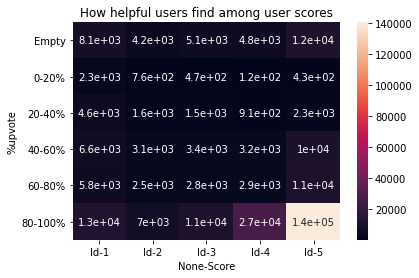

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data1_s.pivot(index='%upvote',columns='Score'),annot=True)
plt.title('How helpful users find among user scores')

In [15]:
data1_s.shape

(30, 3)

In [16]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [17]:
data['Score'].unique()

array([5, 1, 4, 2, 3])

In [18]:
data2 = data[data['Score'] != 3]
X = data2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = data2['Score'].map(y_dict)

#### Score prediction

### convert your text into vectors using NLP

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [20]:
##takes almost 2 mins to execute
X_c = c.fit_transform(X)

In [21]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [24]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9349506291174099


#### fetch Top 20 Positive & Top 20 negative words

In [25]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [26]:
coef = ml.coef_.tolist()[0]
coef

[-0.4061634646597928,
 -0.011636732940142938,
 0.31020165613792694,
 -0.01053732612516115,
 -0.009014802045699823,
 -0.011706127362031539,
 0.0,
 -0.016109665406858903,
 0.0,
 0.00035061210062680326,
 0.0016722520846209378,
 -0.01251419337133251,
 0.0014505973649292473,
 0.014719069139948106,
 -0.4034342094325789,
 0.00698956856959148,
 0.0016162923224541084,
 0.0030754407620292097,
 0.0008809225096680165,
 6.23275117227505e-05,
 0.06982712539831555,
 0.0,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.037051938458427115,
 0.0,
 0.04832001960249575,
 0.0,
 -0.08038514308982096,
 0.0,
 0.0,
 0.0024998470024781188,
 0.11676131115703454,
 2.2455163649658618e-05,
 -0.09727273104797163,
 0.01440240599278064,
 0.00011000033144010658,
 0.00664521970470476,
 -0.06205104363575103,
 0.0,
 0.0,
 7.910558728610567e-05,
 0.0,
 0.0,
 0.00031987354259233893,
 0.0

In [27]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.406163
1,000,-0.011637
2,0000,0.310202
3,000001,-0.010537
4,00001,-0.009015
...,...,...
114964,çaykur,0.000856
114965,çelem,0.000000
114966,être,0.019249
114967,île,0.000000


In [28]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.877794
39072,downside,3.405057
94667,skeptical,3.192522
5865,addicting,2.750282
55029,hooked,2.451290
...,...,...
37560,disappointing,-3.043181
113164,worst,-3.144990
106852,unacceptable,-3.219032
34989,deceptive,-3.264699


In [29]:
print('-Top 5 positive-')
print(coeff_df.head(5).to_string(index=False))
print('\n')
print('-Top 5 negative-')        
print(coeff_df.tail(5).to_string(index=False))

-Top 5 positive-
       Word  Coefficient
 pleasantly     3.877794
   downside     3.405057
  skeptical     3.192522
  addicting     2.750282
     hooked     2.451290


-Top 5 negative-
          Word  Coefficient
 disappointing    -3.043181
         worst    -3.144990
  unacceptable    -3.219032
     deceptive    -3.264699
   undrinkable    -3.609663


#### lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [30]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 5 positive-')
        print(coeff_df.head(5).to_string(index=False))
        print('\n')
        print('-Top 5 negative-')        
        print(coeff_df.tail(5).to_string(index=False))
    
    


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [32]:

text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9372023673680527


-Top 5 positive-
       Word  Coefficient
 pleasantly     4.172585
   downside     3.096874
  skeptical     3.077007
  addicting     2.983391
   hesitant     2.538320


-Top 5 negative-
          Word  Coefficient
 disappointing    -3.201744
         worst    -3.206758
  unacceptable    -3.375770
     deceptive    -3.690381
   undrinkable    -3.974228


### Lets define a predict function

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X,y,nlp_model,ml_model):
    X_c=nlp_model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    ml =ml_model.fit(X_train, y_train)
    predictions = ml.predict(X_test)
    print(confusion_matrix(predictions,y_test))
    print(accuracy_score(predictions,y_test))

In [34]:
predict(X,y,CountVectorizer(),LogisticRegression())

[[ 15080   2747]
 [  5444 108183]]
0.937689229692516


In [35]:
from sklearn.dummy import DummyClassifier

text_fit(X,y,CountVectorizer(),DummyClassifier(),0)

features: 115282
 train records: 394360
 test records: 131454
Model Accuracy: 0.7382582500342325


In [36]:
## here accuracy is decreased compare to old model 

#### Logistic regression model on TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfid = TfidfVectorizer(stop_words='english')

In [40]:
text_fit(X,y,tfid,LogisticRegression(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9341670850639767


#### Upvote prediction

    We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [48]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


In [49]:
data23 = data[data['Score'] == 5]
data23.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [50]:
data_2 = data23[data23['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data_2.shape

(154428, 12)

In [52]:
data_2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%
...,...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0,80-100%
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0,80-100%
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0,80-100%
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%


In [53]:
X = data_2['Text']

In [54]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [55]:
print(y.value_counts())

1.0    209238
0.0     13099
Name: %upvote, dtype: int64


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tf=TfidfVectorizer()
X_c = tf.fit_transform(X,y)